# Estimated beta vs MAF analysis

The goal of this analysis is to see the correlation between MAF and rescaled marginal effect size.

In [5]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import random


In [6]:
random.seed(42)
sns.set_style("white")
sns.set_context("paper", font_scale=1.0)
sns.set_palette(sns.color_palette("rocket"))


In [ ]:
dataset = pl.read_parquet("rescaled-beta.parquet")


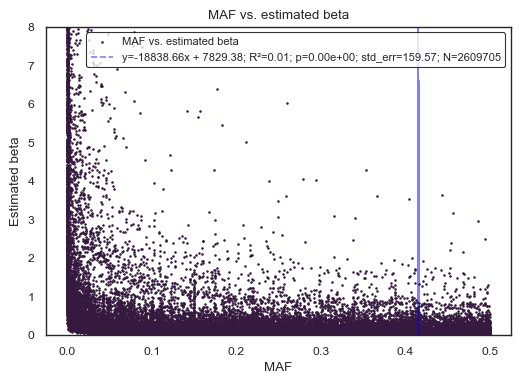

In [7]:
# plot est beta vs maf

data = dataset.select(
    pl.col("majorPopulationMAF"),
    pl.col("rescaledStatistics").struct.field("estimatedBeta").abs(),
    pl.col("studyType"),
).filter(pl.col("majorPopulationMAF").is_not_null() & pl.col("estimatedBeta").is_finite())
reg = linregress(
    data["majorPopulationMAF"],
    data["estimatedBeta"],
)
slope, intercept, r_value, p_value, std_err = reg
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(
    x=data["majorPopulationMAF"],
    y=data["estimatedBeta"],
    label="MAF vs. estimated beta",
    s=1,
)
line_eq = f"y={slope:.2f}x + {intercept:.2f}"
line_eq += f"; R²={r_value**2:.2f}"
line_eq += f"; p={p_value:.2e}"
line_eq += f"; std_err={std_err:.2f}"
line_eq += f"; N={data.shape[0]}"

ax.plot(
    data["majorPopulationMAF"],
    slope * data["majorPopulationMAF"] + intercept,
    "--",
    color="blue",
    alpha=0.5,
    label=line_eq,
)
ax.set_title("MAF vs. estimated beta")
ax.set_xlabel("MAF")
ax.set_ylabel("Estimated beta")
ax.set_ylim(0, 8)
ax.legend(
    loc="upper right",
    fontsize=8,
    title_fontsize=10,
    frameon=True,
    facecolor="white",
    edgecolor="black",
)

plt.show()
